## Debugging CP-Decomposition

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt

### Debug basics

In [2]:
from heuristic_problems import CPDecomposition
from convex_optimizers import GradientDescent

T=np.arange(24).reshape((2,3,4))
optimizer=GradientDescent()
cpd=CPDecomposition(T,2,optimizer)


### Debug gradient descent

0.7071067811865475


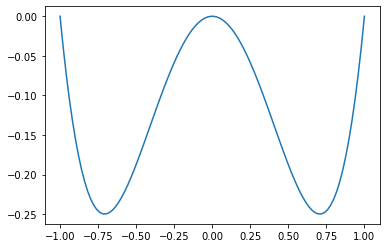

In [30]:
f=lambda x: x**4-x**2
df=lambda x: 4*(x**3)-2*x
xs=np.linspace(-1,1,100)
x_optimal=1/np.sqrt(2)
print(x_optimal)
plt.plot(xs,f(xs))
plt.show()

In [68]:
optimizer=GradientDescent(learning_rate=1E-2,max_iteration=1000)
x_init=np.random.rand()*0.1-0.05
x_final=optimizer.optimize(x_init,df,inspect=100)
print(x_final)

i=0, x=-0.00632
i=100, x=-0.04571
i=200, x=-0.30110
i=300, x=-0.68038
i=400, x=-0.70663
i=500, x=-0.70710
i=600, x=-0.70711
i=700, x=-0.70711
i=800, x=-0.70711
i=900, x=-0.70711
-0.7071067811865359


### Debug gradients

In [20]:
n_trial=10000
optimizer=GradientDescent()
cpd=CPDecomposition(T,2,optimizer,scale_resample=1E-6)

errors=[]

for i in range(n_trial):
    cpd._randomize_vectors(k=None)
    cpd.Us=cpd._calculate_Us()
    cpd.T_approximate=cpd._calculate_T_approximate()
    cpd.energy=cpd.calculate_energy()
    
    v1=cpd._flatten_vectors(cpd.vectors)
    e1=cpd.energy
    grads=cpd._gradients(v1)
    
    cpd._randomize_vectors(k=np.random.randint(cpd.K))
    cpd.Us=cpd._calculate_Us()
    cpd.T_approximate=cpd._calculate_T_approximate()
    cpd.energy=cpd.calculate_energy()
    
    v2=cpd._flatten_vectors(cpd.vectors)
    e2=cpd.energy
    
    errors.append((np.dot(grads,v2-v1)-(e2-e1))/(e2-e1))
    
print("Avg: %.5f" % np.average(errors))
print("Max: %.5f" % np.array(np.abs(errors)).max())

    
    
    

Avg: 0.00000
Max: 0.03182


### Debug local step

In [110]:
T=np.arange(24).reshape((2,3,4))
optimizer=GradientDescent(learning_rate=1E-3,max_iteration=1000)
cpd=CPDecomposition(T,2,optimizer,scale_resample=1E-5)

v1,e1=cpd.vectors, cpd.energy

# v_optimized=cpd.optimizer.optimize(cpd._flatten_vectors(cpd.vectors),lambda _: cpd._gradients(_,recalculate_T_approximate=True))
# cpd.vectors=cpd._deflatten_vectors(v_optimized)
        
# # cpd._randomize_vectors(k=step.k)
# cpd.Us=cpd._calculate_Us()
# cpd.T_approximate=cpd._calculate_T_approximate()
# cpd.energy=cpd.calculate_energy()
steps, es=cpd.get_local_step_candidates()
step=np.random.choice(steps)
print(step.k)
cpd.make_local_step(step)

v2,e2=cpd.vectors, cpd.energy

print(e1,e2)

1
4240.358792150458 4.613344217719843


### Quick implementation of extremal optimization

180673.05086671517
i=0, e=7572.65738, step=2
i=10, e=7281.09118, step=1
i=20, e=7605.82176, step=0
i=30, e=7516.86000, step=1
i=40, e=7299.06683, step=1
i=50, e=7385.27987, step=1
i=60, e=7315.23679, step=1
i=70, e=7641.33608, step=2
i=80, e=7543.38256, step=2
i=90, e=7461.18836, step=1


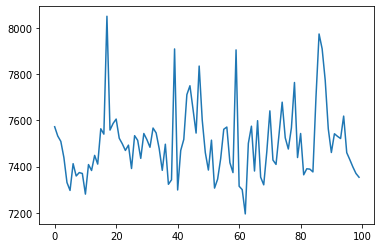

In [143]:
T=np.random.randint(10,size=(10,10,10))
optimizer=GradientDescent(learning_rate=1E-5,max_iteration=1000)
cpd=CPDecomposition(T,3,optimizer,scale_initial=2,scale_resample=2)
print(cpd.energy)
n_iteration=100
inspect=int(n_iteration/10)
tau=1

es=[]
for i in range(n_iteration):
    


    steps, energies=cpd.get_local_step_candidates()
    from scipy.stats import rankdata
    rank=rankdata(energies)
    ps=rank**(-tau)
    ps/=np.sum(ps)
    
    step=np.random.choice(steps,p=ps)
    
    cpd.make_local_step(step)
    
    es.append(cpd.energy)
    if i % inspect==0:
        print("i=%d, e=%.5f, step=%d" % (i,cpd.energy,step.k))
        


plt.plot(np.arange(len(es)),es)
plt.show()

### Misc

In [8]:
a=np.arange(2)+1
b=np.arange(3)+1
c=np.arange(4)+1

print(np.prod(np.ix_(a,b,c)))

[[[ 1  2  3  4]
  [ 2  4  6  8]
  [ 3  6  9 12]]

 [[ 2  4  6  8]
  [ 4  8 12 16]
  [ 6 12 18 24]]]


In [6]:
a=np.arange(24).reshape(2,3,4)+1
b=10/a

s=np.einsum(a,[0,1,2],b,[0,1,2],[0])

print(s)

list(range(10))

c=(0,1,2)
(*c[:-1],0)

[120. 120.]


(0, 1, 0)

## 